<a href="https://colab.research.google.com/github/EricMiao01/Python_for_Data_Analysis/blob/main/Python_%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NumPy**
* data munging, cleaning, subsetting, filtering, transformation
* 一般陣列演算法，例如排序、唯一化以及集合運算
* 資料對其和關聯資料處理。
* 用矩陣表達式取代 if-elif-else
* 操作群組資料

In [195]:
import numpy as np

---

## **4.1 NumPy ndarray：多維陣列物件**
ndarray 是一種通用的同質資料的多維容器，意及所有的勻速型態一定要是一樣的，每個陣列都有一個 shape 以及 dtype 屬性，用來標明維度以及其元素的資料型態。

In [196]:
# 產生隨機資料
data = np.random.randn(2, 3)
data

array([[-0.85883349, -1.78929936,  1.06017619],
       [ 1.13372686, -0.45265522, -0.48330921]])

In [197]:
data.shape

(2, 3)

In [198]:
data.dtype

dtype('float64')

---

### **建立 ndarray**
建立陣列最簡單的方法就是使用 array 函式，它可以接受任何序列物件作為參數（包含另一個陣列），並產生新的 NumPy 陣列。

In [199]:
data1 = [6, 7.5, 8, 9, 10]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  9. , 10. ])

In [200]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

---

我們可以使用 ndim 或 shape 屬性來檢查陣列

In [201]:
arr2.ndim

2

In [202]:
arr2.shape

(2, 4)

---


除非明確指明否則 ndarray 會自動為元素設定適當的資料型態

In [203]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [204]:
arr2.dtype

dtype('int64')

---

可以使用 zeros 或 ones 建立全部為 1 或 0 的陣列；另外也可以使用 empty 去建立擁有指定為度的陣列，但要注意其元素不見得為 0

In [205]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [206]:
np.ones([3, 6])

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [207]:
dim = (2, 3, 2)
np.empty(dim)

array([[[440.49722222,  33.72222222],
        [449.73722222,  33.72222222],
        [458.97722222,  33.72222222]],

       [[458.97722222, 403.32222222],
        [449.73722222, 403.32222222],
        [440.49722222, 403.32222222]]])

In [208]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])



---


|函式|描述|
|:---|:--|
|array|數入資料（須為序列型態），轉換為 ndarray，可以使用 dtype 明確指定元素型態，預設複製所有輸入資料|
|asarray|將數入轉為 ndarray，但如果輸入已經是一個 ndarray，則不進行資料複製|
|arange|功能同內建的 range()，只是回傳的是 ndarray|
|ones, ones_like|依照指定的 shape 和 dtype 產生全為 1 的陣列；ones_like 可以數入的另一個陣列產生 shape 和 dtype 皆相同但全為 1 的陣列|
|zeros, zeros_like|功能同上，但元素填充為 0|
|empty, empty_like|功能同上，但不填充元素|
|full, full_like|指定要填充得直，一指定的 shape 和 dtype 建立新陣列|
|eye, identity|建立 ＮxN 的單位矩陣（對角線為 1；其餘為 0）|




---

### **ndarray 的資料型態**

In [209]:
arr = np.arange(5)
arr.dtype

dtype('int64')

In [210]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [211]:
arr = np.array([3.7, -1.2, -2.6, 0.5])
arr

array([ 3.7, -1.2, -2.6,  0.5])

In [212]:
# 浮點數轉換成整數：小數部分會被截掉
arr.astype(np.int32)

array([ 3, -1, -2,  0], dtype=int32)

---

### **NumPy 陣列的算術運算**

In [213]:
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [214]:
arr * arr

array([[ 1,  4,  9],
       [16, 25, 36]])

In [215]:
arr - arr

array([[0, 0, 0],
       [0, 0, 0]])

In [216]:
# 若與常數運算的話是對每個元素都操作同樣的運算
arr + 1

array([[2, 3, 4],
       [5, 6, 7]])

In [217]:
# 對兩個相等大小的陣列進行比較的話，就會產生出一個布林陣列
arr2 = np.array([[0., 4., 1.], [7, 2, 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [218]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

---

### **基本索引和切片**

In [219]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [220]:
arr[5]

5

In [221]:
arr[5:8]

array([5, 6, 7])

In [222]:
arr[5:8] = 12

In [223]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

若將長數值指定給某個切片的話，該常值就會傳播到整個切片區域。<br>
**這裡和 Python 內建 list 有個重要的區分：陣列切片是在原來的陣列上建立一個 view 而已，意思是資料其實是同一份，並且在切片上修該資料的話會同時修改到原來陣列的內容！**

In [224]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [225]:
arr_slice[1] = 13
arr

array([ 0,  1,  2,  3,  4, 12, 13, 12,  8,  9])

更高維度的操作

In [226]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [227]:
arr2d[2]

array([7, 8, 9])

In [228]:
arr2d[0, 2]

3

In [229]:
arr2d[0, 1:]

array([2, 3])

In [230]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [231]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [232]:
old_values = arr3d[0].copy()
arr3d[0] = 42

In [233]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [234]:
arr3d[0] = old_values

In [235]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [236]:
arr3d[0, 0, 2]

3

### **使用切片作為索引**

In [237]:
arr2d = np.arange(9).reshape((3, 3)) + 1
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [238]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [239]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

### **布林索引**

In [240]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [241]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [242]:
data

array([[ 1.0110497 ,  1.01525692, -1.04063315, -0.84393113],
       [ 0.07064919, -1.03060245,  1.58479404,  0.91505145],
       [ 0.64344699,  0.86865397,  0.56166312,  2.16562534],
       [ 0.74118533, -0.27595149,  0.83967462, -0.87409187],
       [-0.89642572, -0.22579248, -0.79220246, -0.94596797],
       [ 1.26341971,  1.30196461, -0.89687587, -0.06465394],
       [-0.59389895,  1.06427765, -0.9409652 ,  1.06743173]])

In [243]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [244]:
data[names == 'Bob']

array([[ 1.0110497 ,  1.01525692, -1.04063315, -0.84393113],
       [ 0.74118533, -0.27595149,  0.83967462, -0.87409187]])

In [245]:
data[names == 'Bob', 2:]

array([[-1.04063315, -0.84393113],
       [ 0.83967462, -0.87409187]])

In [246]:
data[names == 'Bob', 3]

array([-0.84393113, -0.87409187])

In [247]:
# 若要選取相反遙見可以使用 != 或是 ~
data[~(names == 'Bob')]

array([[ 0.07064919, -1.03060245,  1.58479404,  0.91505145],
       [ 0.64344699,  0.86865397,  0.56166312,  2.16562534],
       [-0.89642572, -0.22579248, -0.79220246, -0.94596797],
       [ 1.26341971,  1.30196461, -0.89687587, -0.06465394],
       [-0.59389895,  1.06427765, -0.9409652 ,  1.06743173]])

In [248]:
# 多條件時可以使用集合運算子 & （且）；|（或）
mask = (names == 'Bob') | (names == 'Will')

In [249]:
mask

array([ True, False,  True,  True,  True, False, False])

In [250]:
data[mask]

array([[ 1.0110497 ,  1.01525692, -1.04063315, -0.84393113],
       [ 0.64344699,  0.86865397,  0.56166312,  2.16562534],
       [ 0.74118533, -0.27595149,  0.83967462, -0.87409187],
       [-0.89642572, -0.22579248, -0.79220246, -0.94596797]])

### **花式索引**

In [251]:
arr = np.empty((8, 4))

In [252]:
for i in range(8):
    arr[i] = i

In [253]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [254]:
# 若想按照特定順序選取列，可以傳入一個指定順序的 list 或 ndarray
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [255]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [256]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [257]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

上面的程式碼實際上是將 (1, 0) (5, 3) (7, 1) (2, 2) 的元素取出，**而非下列這種的方形區域**

In [258]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### **轉置陣列及軸交換**

In [259]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [260]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [261]:
# 計算內積
arr = np.random.randn(6, 3)
arr

array([[-0.99944525,  1.55843177, -0.13223973],
       [-0.23084909,  0.4081048 ,  0.19423631],
       [-0.33452171, -0.38906941,  0.5665264 ],
       [-0.59330784,  1.24621941,  2.2041112 ],
       [-2.43055286, -0.61315879,  0.66763294],
       [-0.11685199, -0.26485328, -1.76051323]])

In [262]:
# 3*6 dot 6*3 -> 3*3
np.dot(arr.T, arr)

array([[ 7.43734267, -0.73975394, -2.82690245],
       [-0.73975394,  4.74580788,  2.45648295],
       [-2.82690245,  2.45648295,  8.77941403]])

若要對付更高維度的陣列，transpose 方法可以接受軸編號 tuple，以這個 tuple 來排列軸

In [263]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [264]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

在上述的例子中軸的次序變成第二軸優先，然後第一軸次之，最次才是第三軸

## **4.2 全域函示：快速元素級別陣列函示**
全域函示是一種對 ndarray 裡的資料執行元素級別運算的涵式，也稱 *ufunc*

In [265]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [266]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [267]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

上述為一元 *ufun*；下列則為二元全域函式的例子

In [268]:
x = np.random.randn(8)
y = np.random.randn(8)
print(x)
print(y)

[ 0.1606696   1.16734843 -1.76434179  0.30120527  1.07917512  1.95039356
  0.95683845 -1.18016425]
[-1.56599959 -0.1087983  -3.09792367  0.52426647 -2.0365045   0.37006681
 -1.38869655  0.20123845]


In [269]:
np.maximum(x, y)

array([ 0.1606696 ,  1.16734843, -1.76434179,  0.52426647,  1.07917512,
        1.95039356,  0.95683845,  0.20123845])

modf 為 python 內建 divmod 的向量版本

In [270]:
arr = np.random.randn(7) * 5
arr

array([-6.68518075, -1.02741527,  8.10508836, -1.77400645,  9.94698774,
       -0.28959326, -0.5527676 ])

In [271]:
remainder, whole_part = np.modf(arr)

In [272]:
remainder

array([-0.68518075, -0.02741527,  0.10508836, -0.77400645,  0.94698774,
       -0.28959326, -0.5527676 ])

In [273]:
whole_part

array([-6., -1.,  8., -1.,  9., -0., -0.])

## **4.3 用陣列寫陣列導向程式**

In [274]:
points = np.arange(-5, 5, 0.01) # 1000個等距點

In [275]:
# np.meshgrid 接受一維陣列參數並產生出兩個二維矩陣，
# 這兩個二維矩陣能將原來兩個陣列中所有元素配對成一組組 (x, y)
xs, ys = np.meshgrid(points, points)

In [276]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [277]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [278]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

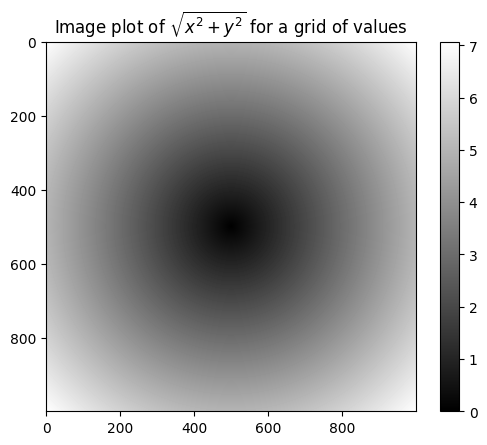

In [279]:
import matplotlib.pyplot as plt
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.imshow(z, cmap = plt.cm.gray); plt.colorbar()

### **用陣列運算表達條件邏輯**
numpy.where 函式是 x if condition else y 這個三元表達式的向量版本

In [280]:
x_arr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
y_arr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond= np.array([True, False, True, True, False])

In [281]:
result = [(x if c else y) for x, y, c in zip(x_arr, y_arr, cond)]
result = np.array(result)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [282]:
result = np.where(cond, x_arr, y_arr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

假設資料處理有一筆隨機資料，我們想要將其正值改為 2，其負值改為 -2

In [283]:
arr = np.random.randn(4, 4)
arr

array([[-1.3695325 ,  0.43764448,  1.44901952,  0.890519  ],
       [-0.37298669,  0.33612727,  1.01117369, -3.06056968],
       [-0.21242167,  2.61861921, -0.24685636, -0.94310735],
       [ 0.62719181,  0.18044249,  1.22015751, -1.10989804]])

In [284]:
np.where(arr > 0, 2, -2)

array([[-2,  2,  2,  2],
       [-2,  2,  2, -2],
       [-2,  2, -2, -2],
       [ 2,  2,  2, -2]])

In [285]:
# 也可以讓負值維持原值
np.where(arr > 0, 2, arr)

array([[-1.3695325 ,  2.        ,  2.        ,  2.        ],
       [-0.37298669,  2.        ,  2.        , -3.06056968],
       [-0.21242167,  2.        , -0.24685636, -0.94310735],
       [ 2.        ,  2.        ,  2.        , -1.10989804]])

### **數學和統計方法**

In [286]:
arr = np.random.randn(5, 4)
arr

array([[-2.16715865,  0.68202755,  1.45171228,  1.48142701],
       [ 0.70759731,  0.58742587, -0.40598544,  0.83157203],
       [-1.21867163,  0.28836194, -0.40286593,  0.24780269],
       [ 0.80048723, -0.63708508, -0.30038813,  0.94620602],
       [ 0.3339385 , -0.25282817, -0.3172815 , -1.28593186]])

In [287]:
arr.mean()

0.06851810307572839

In [288]:
np.mean(arr)

0.06851810307572839

In [289]:
arr.sum()

1.3703620615145677

In [290]:
np.sum(arr)

1.3703620615145677

像是 sum() mean() 這種函式可以接受 axis 指定軸方向計算統計資料

In [291]:
arr = np.arange(10).reshape((5, 2))
arr

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [292]:
arr.mean(axis = 1)

array([0.5, 2.5, 4.5, 6.5, 8.5])

In [293]:
arr.sum(axis = 0)

array([20, 25])

cumsum 和 cumprod 不會做聚合，會回傳結果陣列

In [294]:
arr = np.arange(9).reshape(3, 3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [295]:
arr.cumsum(axis = 0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [296]:
arr.cumprod(axis = 1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### **其他方法**

In [297]:
# 排序
arr = np.random.randn(6)
arr

array([-2.18139064, -0.40827837,  1.40188237, -0.52370491,  1.0056394 ,
        1.69544911])

In [298]:
arr.sort()
arr

array([-2.18139064, -0.52370491, -0.40827837,  1.0056394 ,  1.40188237,
        1.69544911])

In [299]:
# unique (distinct)
names = np.array(['Bob', 'Joe', 'Will', 'Bob'])
names

array(['Bob', 'Joe', 'Will', 'Bob'], dtype='<U4')

In [300]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

## **4.4 從檔案輸入或輸出值到陣列**

In [301]:
arr = np.arange(10)
np.save('some_array', arr)

In [302]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [303]:
# 儲存多個陣列，可以得到一個 dict-like object
np.savez('array_archive', a=arr, b=arr)

In [304]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## **4.5 線性代數**

In [305]:
x = np.arange(6).reshape(2, 3) + 1
x

array([[1, 2, 3],
       [4, 5, 6]])

In [306]:
y = np.array([[6, 23], [-1, 7], [8, 9]], dtype=np.float64)
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [307]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [308]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

## **4.6 生成偽隨機數**

In [309]:
samples = np.random.normal(size = (4, 4))
samples

array([[ 1.38757153, -0.54231274, -0.24626406,  0.01851305],
       [-0.13041961,  0.25351363,  0.34556735,  0.91304394],
       [ 0.75903551,  2.57123844,  1.47198031, -0.25909492],
       [-0.1186404 ,  0.40956593, -0.47066256, -0.83266725]])

|函式|描述|
|:-|:-|
|seed|設定涮物產生器種子|
|permutation|回傳一個打亂過的序列，或是打亂過的陣列|
|shuffle|以 in-place 的方式打亂一個序列|
|rand|從均勻分布中抽取樣本|
|randn|從標準常態分配中抽取樣本|
|randint|指低到高區間並從中抽取整數樣本|
|binomial|從二項分布中抽取樣本|
|normal|從常態分布中抽取樣本|
|beta|從 beta 中抽取樣本|
|chisquare|同理|
|gamma|同理|
|uniform|從均勻分布 [0, 1) 中抽取樣本|


## **4.7 模擬隨機漫步**

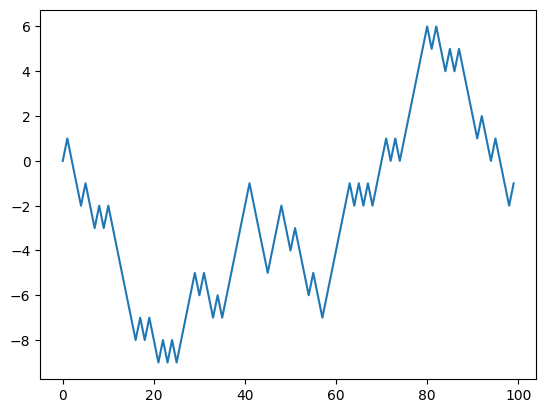

In [310]:
# 以純 python 示範：
import random

position = 0
walk = [position]

steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

plt.plot(walk[:100])

實際上 walk 其實就是把隨機的每一步加總，也可以被當作陣列來運算，就像我用 np.random 模組連續投擲硬幣 10000 次，正面為 1 反面為 -1，然後計算累加總數

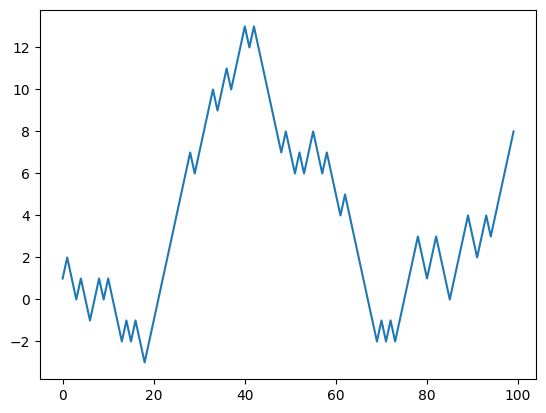

In [311]:
n_steps = 1000
draws = np.random.randint(0, 2, size = n_steps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

plt.plot(walk[:100])

In [312]:
# 尋找首次穿越時間：走多少部後可以達到我們想要的指定值
(np.abs(walk) >= 10).argmax() # 尋找何時達到 10 或 -10 遠的地方
# argmax() 回傳最大值所在位置（重複的話會回穿第一個出現的位置）

33

In [313]:
walk[20]

-1

### **一次模擬許多隨機漫步過程**

In [314]:
nwalks = 5000 # 模擬 5000 次隨機漫步
nsteps = 1000 # 每個隨機漫步都走 1000 步
draws = np.random.randint(0, 2, size = (nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis = 1)
walks

array([[  1,   2,   1, ..., -16, -17, -16],
       [ -1,  -2,  -3, ..., -60, -61, -60],
       [  1,   0,  -1, ..., -10, -11, -12],
       ...,
       [  1,   2,   3, ...,  -6,  -5,  -6],
       [  1,   0,   1, ...,  -2,  -1,   0],
       [  1,   2,   1, ...,  36,  35,  34]])

In [315]:
walks.shape

(5000, 1000)

In [316]:
# 想知道 5000 次模擬裡面有多少次走到了 30 步
hist30 = (np.abs(walks) >= 30).any(1) # 按照 1 軸檢查有無 True

In [317]:
hist30.sum()

3411

In [318]:
# 計算平均穿越時間
crossing_times = (np.abs(walks[hist30]) >= 30).argmax(axis = 1)
crossing_times.shape

(3411,)